# TRABALHO DE MINERAÇÃO E CIÊNCIA DE DADOS
### Professor: José Maria da Silva Monteiro Filho
### Aluno: Hyago Sayomar Dias Ferreira
##### Link do youtube: https://www.youtube.com/watch?v=AegN1T7ZPnc&ab_channel=HyagoDiaz
##### 2022.1

## DATASET DO CAMPEONATO BRASILEIRO SÉRIE A
#### url(https://www.terra.com.br/esportes/futebol/brasileiro-serie-a/tabela/)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
from plotnine import *
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py
import seaborn as sns
import random
from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
url = 'https://www.terra.com.br/esportes/futebol/brasileiro-serie-a/tabela/'
diab = requests.get(url)
sopa = BeautifulSoup(diab.text, 'html')

In [3]:
table = sopa.find_all(name="table")

In [4]:
str1 = str(table)

In [5]:
pf = pd.read_html(str1)[0]

In [6]:
colDrop = ['Times.1', 'Times.3']

In [7]:
tabela = pf.drop(colDrop, axis=1)

In [8]:
tabela.to_csv('brasileirao.csv')

In [9]:
dataset = pd.read_csv('brasileirao.csv')

In [10]:
dataset = dataset.rename(columns={'Times': 'Classificação'})
dataset = dataset.rename(columns={'Times.2': 'Times'})
dataset = dataset.drop(columns=['Unnamed: 0'])

In [11]:
dataset

,Classificação,Times,P,J,V,E,D,GP,GC,SG,%
0,1,Palmeiras >>,33,17,9,6,2,28,12,16,64
1,2,Atlético-MG >>,31,17,8,7,2,25,17,8,60
2,3,Corinthians >>,29,17,8,5,4,19,17,2,56
3,4,Internacional >>,29,17,7,8,2,23,15,8,56
4,5,Fluminense >>,28,17,8,4,5,24,17,7,54
5,6,Athletico-PR >>,28,17,8,4,5,20,17,3,54
6,7,Flamengo >>,24,17,7,3,7,20,17,3,47
7,8,Bragantino >>,24,17,6,6,5,27,20,7,47
8,9,São Paulo >>,24,17,5,9,3,22,18,4,47
9,10,Ceará >>,24,18,5,9,4,20,18,2,44


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Classificação  20 non-null     int64 
 1   Times          20 non-null     object
 2   P              20 non-null     int64 
 3   J              20 non-null     int64 
 4   V              20 non-null     int64 
 5   E              20 non-null     int64 
 6   D              20 non-null     int64 
 7   GP             20 non-null     int64 
 8   GC             20 non-null     int64 
 9   SG             20 non-null     int64 
 10  %              20 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.8+ KB


## Medidas de Tendência Central
##### Média e Mediana

In [13]:
print(f"PONTUAÇÕES:\nMédia: {dataset['P'].mean()} | Mediana: {dataset['P'].median()}")
print(f"JOGOS:\nMédia: {dataset['J'].mean()} | Mediana: {dataset['J'].median()}")
print(f"VITÓRAS:\nMédia: {dataset['V'].mean()} | Mediana: {dataset['V'].median()}")
print(f"EMPATES:\nMédia: {dataset['E'].mean()} | Mediana: {dataset['E'].median()}")
print(f"DERROTAS:\nMédia: {dataset['D'].mean()} | Mediana: {dataset['D'].median()}")
print(f"GOLS POR PARTIDA:\nMédia: {dataset['GP'].mean()} | Mediana: {dataset['GP'].median()}")
print(f"GOLS CONTRA:\nMédia: {dataset['GC'].mean()} | Mediana: {dataset['GC'].median()}")
print(f"SALDO DE GOLS:\nMédia: {dataset['SG'].mean()} | Mediana: {dataset['SG'].median()}")
print(f"APROVEITAMENTO:\nMédia: {dataset['%'].mean()} | Mediana: {dataset['%'].median()}")

PONTUAÇÕES:
Média: 22.95 | Mediana: 23.0
JOGOS:
Média: 17.1 | Mediana: 17.0
VITÓRAS:
Média: 5.85 | Mediana: 5.5
EMPATES:
Média: 5.4 | Mediana: 5.0
DERROTAS:
Média: 5.85 | Mediana: 5.5
GOLS POR PARTIDA:
Média: 19.55 | Mediana: 20.0
GOLS CONTRA:
Média: 19.55 | Mediana: 18.0
SALDO DE GOLS:
Média: 0.0 | Mediana: 2.0
APROVEITAMENTO:
Média: 44.3 | Mediana: 43.5


In [14]:
time = []
dados_times = []
for times in dataset['Times']:
    time.append(times)
dados = dataset.loc[dataset['Times'] == time]
for i in range(0,20):
    for j in range(1,11):
        dados_times.append(dados.iloc[i,j])

In [15]:
print("--------MÉDIA E MEDIANA POR TIMES-------\n")
for dado in dados_times:
    if(dado == 'Palmeiras >>'):
        Palmeiras = dados_times[1:10]
        print(f"Palmeiras: Média {sum(Palmeiras)/9:.2f} | Mediana {np.median(Palmeiras)}")
    elif(dado == 'Athletico-PR >>'):
        Athletico_PR = dados_times[11:20]
        print(f"Athletico-PR: Média {sum(Athletico_PR)/9:.2f} | Mediana {np.median(Athletico_PR)}")        
    elif(dado == 'Atlético-MG >>'):
        Atletico_MG = dados_times[21:30]
        print(f"Atlético-MG: Média {sum(Atletico_MG)/9:.2f} | Mediana {np.median(Atletico_MG)}")
    elif(dado == 'Corinthians >>'):
        Corinthians = dados_times[31:40]
        print(f"Corinthians: Média {sum(Corinthians)/9:.2f} | Mediana {np.median(Corinthians)}")
    elif(dado == 'Internacional >>'):
        Internacional = dados_times[41:50]
        print(f"Internacional: Média {sum(Internacional)/9:.2f} | Mediana {np.median(Internacional)}")
    elif(dado == 'Fluminense >>'):
        Fluminense = dados_times[51:60]
        print(f"Fluminense: Média {sum(Fluminense)/9:.2f} | Mediana {np.median(Fluminense)}")
    elif(dado == 'São Paulo >>'):
        Sao_Paulo = dados_times[61:70]
        print(f"São Paulo: Média {sum(Sao_Paulo)/9:.2f} | Mediana {np.median(Sao_Paulo)}")
    elif(dado == 'Flamengo >>'):
        Flamengo = dados_times[71:80]
        print(f"Flamengo: Média {sum(Flamengo)/9:.2f} | Mediana {np.median(Flamengo)}")
    elif(dado == 'Botafogo >>'):
        Botafogo = dados_times[81:90]
        print(f"Botafogo: Média {sum(Botafogo)/9:.2f} | Mediana {np.median(Botafogo)}")
    elif(dado == 'Santos >>'):
        Santos = dados_times[91:100]
        print(f"Santos: Média {sum(Santos)/9:.2f} | Mediana {np.median(Santos)}")
    elif(dado == 'Avaí >>'):
        Avai = dados_times[101:110]
        print(f"Avaí: Média {sum(Avai)/9:.2f} | Mediana {np.median(Avai)}")
    elif(dado == 'Coritiba >>'):
        Coritiba = dados_times[111:120]
        print(f"Coritiba: Média {sum(Coritiba)/9:.2f} | Mediana {np.median(Coritiba)}")
    elif(dado == 'América-MG >>'):
        America_MG = dados_times[121:130]
        print(f"Coritiba: Média {sum(America_MG)/9:.2f} | Mediana {np.median(America_MG)}")
    elif(dado == 'Bragantino >>'):
        Bragantino = dados_times[131:140]
        print(f"Bragantino: Média {sum(Bragantino)/9:.2f} | Mediana {np.median(Bragantino)}")
    elif(dado == 'Ceará >>'):
        Ceara = dados_times[141:150]
        print(f"Ceará: Média {sum(Ceara)/9:.2f} | Mediana {np.median(Ceara)}")
    elif(dado == 'Atlético Goianiense >>'):
        Atletico_Goianiense = dados_times[151:160]
        print(f"Atlético Goianiense: Média {sum(Atletico_Goianiense)/9:.2f} | Mediana {np.median(Atletico_Goianiense)}")
    elif(dado == 'Goiás >>'):
        Goias = dados_times[161:170]
        print(f"Goiás: Média {sum(Goias)/9:.2f} | Mediana {np.median(Goias)}")
    elif(dado == 'Cuiabá >>'):
        Cuiaba = dados_times[171:180]
        print(f"Cuiabá: Média {sum(Cuiaba)/9:.2f} | Mediana {np.median(Cuiaba)}")
    elif(dado == 'Juventude >>'):
        Juventude = dados_times[181:190]
        print(f"Juventude: Média {sum(Juventude)/9:.2f} | Mediana {np.median(Juventude)}")
    elif(dado == 'Fortaleza >>'):
        Fortaleza = dados_times[191:200]
        print(f"Fortaleza: Média {sum(Fortaleza)/9:.2f} | Mediana {np.median(Fortaleza)}")

--------MÉDIA E MEDIANA POR TIMES-------

Palmeiras: Média 20.78 | Mediana 16.0
Atlético-MG: Média 17.44 | Mediana 17.0
Corinthians: Média 18.33 | Mediana 15.0
Internacional: Média 18.22 | Mediana 17.0
Fluminense: Média 17.33 | Mediana 17.0
Athletico-PR: Média 19.44 | Mediana 17.0
Flamengo: Média 17.67 | Mediana 17.0
Bragantino: Média 14.22 | Mediana 16.0
São Paulo: Média 16.11 | Mediana 17.0
Ceará: Média 12.89 | Mediana 13.0
Santos: Média 16.00 | Mediana 18.0
Botafogo: Média 16.56 | Mediana 17.0
Avaí: Média 15.44 | Mediana 16.0
Goiás: Média 12.33 | Mediana 12.0
Cuiabá: Média 13.11 | Mediana 17.0
Coritiba: Média 14.44 | Mediana 17.0
Coritiba: Média 14.78 | Mediana 18.0
Atlético Goianiense: Média 14.44 | Mediana 17.0
Fortaleza: Média 11.33 | Mediana 13.0
Juventude: Média 11.44 | Mediana 14.0


## Medidas de Variabilidade

In [16]:
# Média das pontuações por times
media_pontos = np.mean(dataset['P'])
media_pontos

22.95

In [17]:
# Calculando o Desvio
desvio = dataset['P'].apply(lambda x: x - media_pontos)
#Mostrando só 10
desvio.head(10)

0    10.05
1     8.05
2     6.05
3     6.05
4     5.05
5     5.05
6     1.05
7     1.05
8     1.05
9     1.05
Name: P, dtype: float64

In [18]:
#Desvio Absoluto Médio (ou Média do Desvio Absoluto)
des = 0
for i in range(len(dataset)):
    des += abs((dataset['P'].loc[i] - media_pontos))
des = des/len(dataset)
print(f"ABS: {des}")

ABS: 4.450000000000001


In [19]:
#Variância
np.var(dataset['P'])

28.847500000000004

In [20]:
#Desvio Padrão
np.std(dataset['P'])

5.37098687393667

## Tabela de Frequência e Histograma

In [21]:
series = dataset['P'].value_counts()
series

24    4
21    3
29    2
28    2
19    2
33    1
31    1
22    1
18    1
17    1
14    1
13    1
Name: P, dtype: int64

In [22]:
tatal_valores = series.sum()
tatal_valores

20

In [23]:
data = pd.DataFrame(series)
data

,P
24,4
21,3
29,2
28,2
19,2
33,1
31,1
22,1
18,1
17,1


In [24]:
data['Frequência %'] = round(data['P'] * 100 / tatal_valores,2)
data

,P,Frequência %
24,4,20.0
21,3,15.0
29,2,10.0
28,2,10.0
19,2,10.0
33,1,5.0
31,1,5.0
22,1,5.0
18,1,5.0
17,1,5.0


In [25]:
table = pd.DataFrame({"Pontos": data.index,
                    "Num. Vezes": data['P'],
                    "Freq. %": data['Frequência %']})
table.sort_index(inplace=True)
table

,Pontos,Num. Vezes,Freq. %
13,13,1,5.0
14,14,1,5.0
17,17,1,5.0
18,18,1,5.0
19,19,2,10.0
21,21,3,15.0
22,22,1,5.0
24,24,4,20.0
28,28,2,10.0
29,29,2,10.0


In [26]:
bins = math.ceil(1 + 3.3 * math.log10(len(dataset['P'])))
bins

6

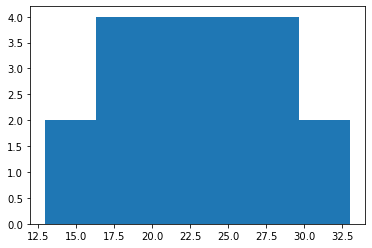

In [27]:
#histograma da columa pontos
plt.hist(dataset['P'], bins=bins)
plt.show()

In [28]:
k = int(math.sqrt(len(dataset['P'])))
k

4

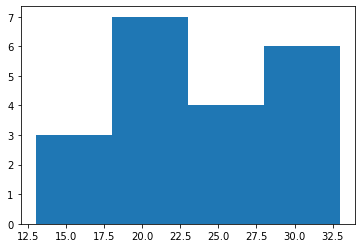

In [29]:
plt.hist(dataset['P'], bins=k)
plt.show()

In [30]:
fre_dataset = dataset.groupby(['P']).size().reset_index(name='Freq')
fre_dataset

,P,Freq
0,13,1
1,14,1
2,17,1
3,18,1
4,19,2
5,21,3
6,22,1
7,24,4
8,28,2
9,29,2


In [31]:
length = fre_dataset['P']
labels = fre_dataset['Freq']

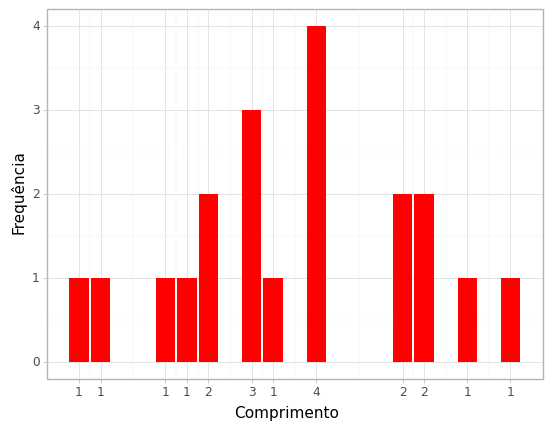

<ggplot: (188300304475)>

In [32]:
(ggplot(fre_dataset, aes(fre_dataset['P'],'Freq'))
  + geom_col(fill='red')
  + scale_x_continuous(breaks=length, labels=labels)
  + theme_light()
  + xlab('Comprimento')
  + ylab('Frequência')
)

In [33]:
data_zscore = stats.zscore(dataset['P'])
data_zscore

0     1.871165
1     1.498793
2     1.126422
3     1.126422
4     0.940237
5     0.940237
6     0.195495
7     0.195495
8     0.195495
9     0.195495
10   -0.176876
11   -0.363062
12   -0.363062
13   -0.363062
14   -0.735433
15   -0.735433
16   -0.921618
17   -1.107804
18   -1.666360
19   -1.852546
Name: P, dtype: float64

In [34]:
Dist, p_v = scipy.stats.kstest(data_zscore, 'norm', alternative = 'greater')

In [36]:
#Dist é a Distância e p_v é o p-value
if(Dist < p_v):
    print("Segue a normal!")
else:
    print("Não segue a normal!")

Segue a normal!


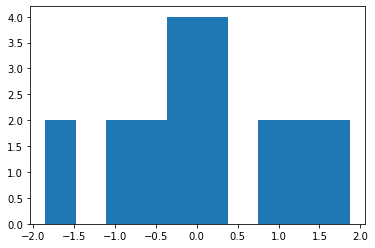

In [37]:
plt.hist(data_zscore) 
plt.show()

In [38]:
#dataset['P'][0] = 190
#dataset['P'][0]

<AxesSubplot:>

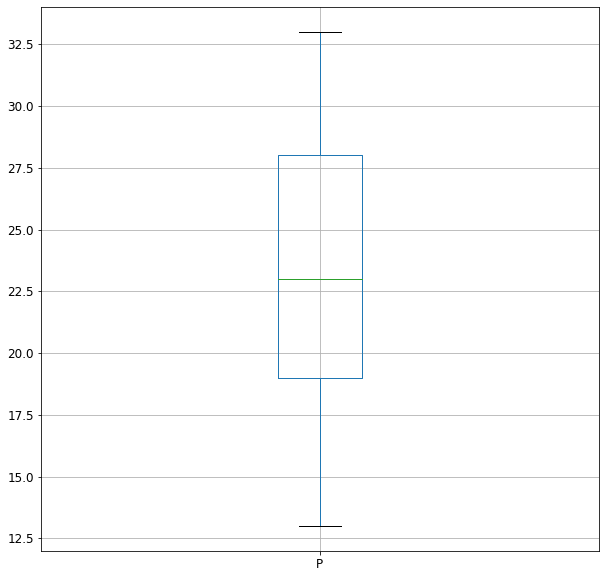

In [39]:
dataset.boxplot(column=['P'], fontsize='large', figsize=(10,10))

<AxesSubplot:title={'center':'P'}, xlabel='Classificação'>

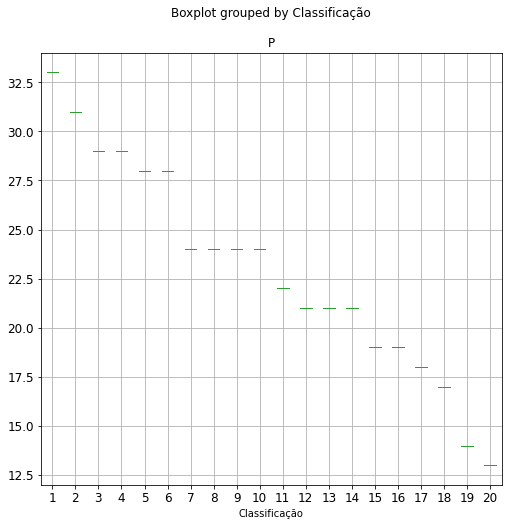

In [40]:
dataset.boxplot(by='Classificação', column=['P'], fontsize='large', figsize=(8,8))

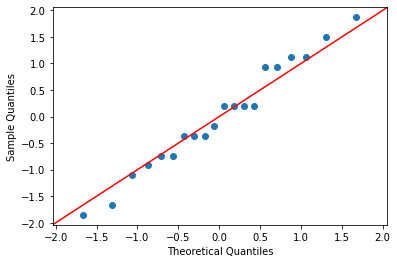

In [41]:
sm.qqplot(data_zscore, line ='45') 
py.show() 

<AxesSubplot:>

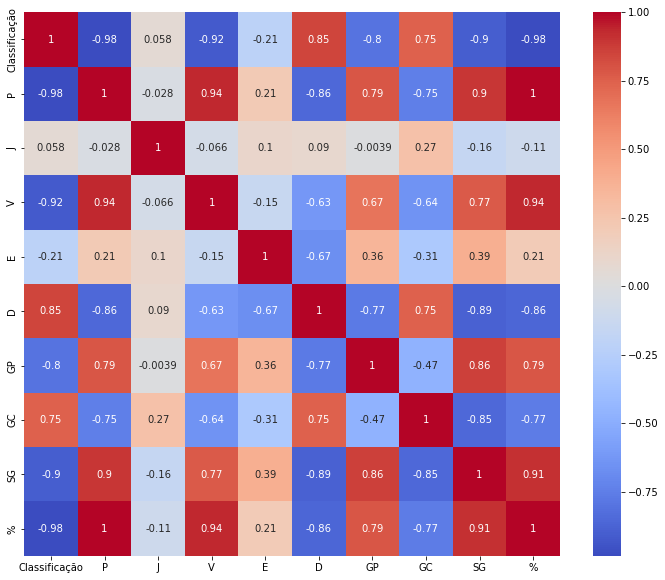

In [42]:
corr_s = dataset.corr()
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
sns.heatmap(corr_s, cmap="coolwarm", annot=True, ax=ax)

In [43]:
points = dataset["P"].values

,sumsquare_error,aic,bic,kl_div
lognorm,2.500056,641.668092,-32.601188,inf
gamma,2.500356,641.542157,-32.598783,inf
norm,2.500497,639.537315,-35.593387,inf
burr,2.503454,651.823714,-29.578289,inf
beta,2.506168,612.512427,-29.556620,inf


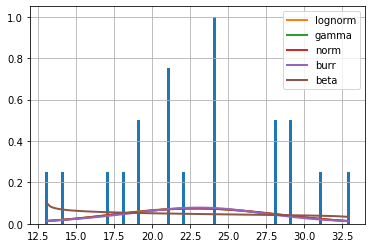

In [44]:
fiter = Fitter(points,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
fiter.fit()
fiter.summary()

## USANDO UM CLASSIFICADOR PARA PREDIZER A PONTUAÇÃO DOS TIMES

In [45]:
X = dataset[["J","V", "E", "D", "GP", "GC", "SG", "%"]]
Y = dataset["P"]

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)

In [92]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)
print(f"Accuracy: {knn.score(X_test,Y_test )}")

Accuracy: 0.0


In [93]:
#Palmeiras = [[17,9,6,2,28,12,16,64]]
#Flamengo = [[17,7,3,7,20,17,3,47]]
#Fortaleza = [[17,3,5,9,14,21,-7,27]]
#Juventude = [[17,2,7,8,15,28,-13,25]]
Avai = [[18,6,3,9,19,28,-9,3]]

In [94]:
print(f"Predição: {knn.predict(Avai)}")

Predição: [21]


C:\Users\resid\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


### DATASET DA LIGA NACIONAL DE FUTBALL AMERICANO (NACIONAL FOTEBALL LEAGUE)
#### url(https://www.nfl.com/standings/league/2021/PRE)

In [ ]:
url = 'https://www.nfl.com/standings/league/2021/PRE'
pagina = requests.get(url)

In [ ]:
sopa = BeautifulSoup(pagina.text, 'html')

In [ ]:
tabela = sopa.find('table', {'summary':'Standings - Detailed View'})
cabecalhos = []

In [ ]:
for i in tabela.find_all('th'):
    cab = i.text.strip()
    cabecalhos.append(cab)

In [ ]:
data_cab = pd.DataFrame(columns = cabecalhos)
for linhas in tabela.find_all('tr')[1:]:
    dados = linhas.find_all('td')
    linhas_tab = [dado.text.strip() for dado in dados]
    tam = len(data_cab)
    data_cab.loc[tam] = linhas_tab
data_cab.head(10)  

In [ ]:
data_cab.to_csv('nfl.csv')

### DATASET DA POPULAÇÃO MUNDIAL DE 2022 POR CONTINENTES
#### SITE: url(https://www.worldometers.info/world-population/population-by-region/)

In [ ]:
url = 'https://www.worldometers.info/world-population/population-by-region/'
pop = requests.get(url)

In [ ]:
sopa = BeautifulSoup(pop.text, 'html.parser')

In [ ]:
pop_continente = sopa.find('table', {'class':'table table-hover table-condensed'})

In [ ]:
head = []
for i in pop_continente.find_all('th'):
    pop_dados = i.text.strip()
    head.append(pop_dados)

In [ ]:
pop_cab = pd.DataFrame(columns = head)
for linhas in pop_continente.find_all('tr')[1:]:
    dados = linhas.find_all('td')
    linhas_tab = [dado.text.strip() for dado in dados]
    tam = len(pop_cab)
    pop_cab.loc[tam] = linhas_tab
pop_cab

In [ ]:
pop_cab.to_csv('continentes_pop.csv')

### DATASET DA POPULAÇÃO MUNDIAL DE 2022 POR PAÍS 
#### SITE: url(https://www.worldometers.info/world-population/population-by-country/)

In [ ]:
url = 'https://www.worldometers.info/world-population/population-by-country/'
pagina = requests.get(url)

In [ ]:
sopa = BeautifulSoup(pagina.text, 'lxml')

In [ ]:
tabela = sopa.find('table', {'id':'example2'})
cabecalhos = []

In [ ]:
for i in tabela.find_all('th'):
    cab = i.text
    cabecalhos.append(cab)

In [ ]:
data_cab = pd.DataFrame(columns = cabecalhos)
for linhas in tabela.find_all('tr')[1:]:
    dados = linhas.find_all('td')
    linhas_tab = [dado.text.strip() for dado in dados]
    tam = len(data_cab)
    data_cab.loc[tam] = linhas_tab
data_cab.head(10)

In [ ]:
data_cab.to_csv('populacao_paises.csv')

### DATASET DA POPULAÇÃO MUNDIAL POR ANO 
##### SITE: url(https://www.worldometers.info/world-population/world-population-by-year/)

In [ ]:
url = 'https://www.worldometers.info/world-population/world-population-by-year/'
pop_years = requests.get(url)

In [ ]:
sopa = BeautifulSoup(pop_years.text, 'html')

In [ ]:
tabela_pop_years = sopa.find('table', {'class':'table table-hover table-condensed'})
cap_pop_years = []

In [ ]:
for i in tabela_pop_years.find_all('th'):
    cab = i.text
    cap_pop_years.append(cab)

In [ ]:
data_cab = pd.DataFrame(columns = cap_pop_years)
for linhas in tabela_pop_years.find_all('tr')[1:]:
    dados = linhas.find_all('td')
    linhas_tab = [dado.text.strip() for dado in dados]
    tam = len(data_cab)
    data_cab.loc[tam] = linhas_tab
    
data_cab.head(10)

In [ ]:
data_cab.to_csv('populacao_por_anos.csv')